In [2]:
# !wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/102/634/original/medical_cost.zip -P ../data
# !unzip ../data/medical_cost.zip -d ../data

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
insurance = pd.read_csv('../data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df = insurance
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Q. is avg. charge different than industry std. charge of 13000 ?


In [6]:
charges = df['charges']
charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Axes: xlabel='charges', ylabel='Count'>

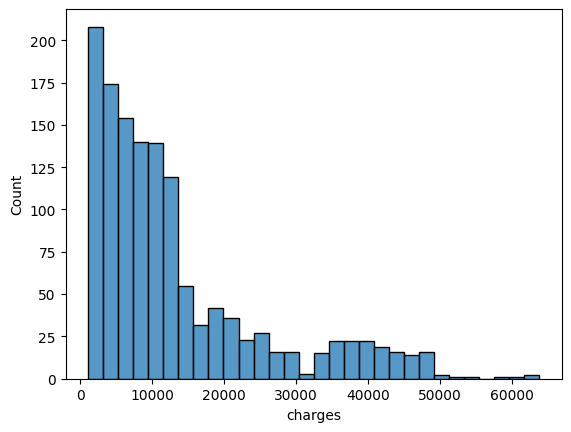

In [7]:
sns.histplot(charges)

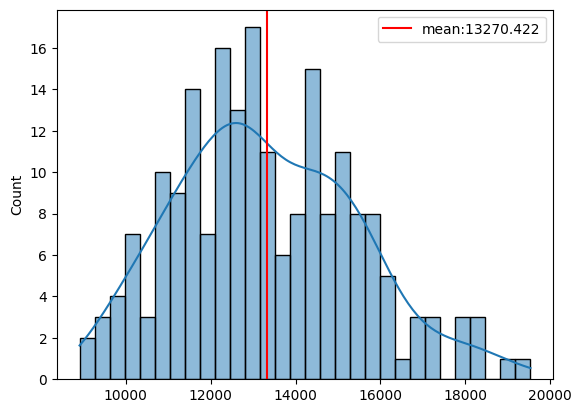

In [8]:
# // sampling distribution of sample means:
means = []
sample_size = 30
for i in range(200):
    mean = np.mean(np.random.choice(charges , sample_size , replace = False))
    means.append(mean)

sns.histplot(means , bins = 30 , kde = True)
plt.axvline(np.mean(means) , color = 'red' , label = 'mean:'+ str(np.around(np.mean(charges) , 3)))
plt.legend()

In [9]:
mean = np.mean(charges)
std = np.std(charges)
n = charges.shape[0]
n , mean , std

(1338, np.float64(13270.422265141257), np.float64(12105.484975561612))

In [10]:
z = (mean - 13000)/ (std/np.sqrt(n))
z , stats.norm.cdf(z)

(np.float64(0.817124646210979), np.float64(0.7930714002130685))

In [11]:
pval =  2 * (1 - stats.norm.cdf(z))
pval

np.float64(0.4138571995738629)

In [12]:
ci = 0.95
stderr = std / np.sqrt(n)
zcritical = stats.norm.ppf((1+ci) / 2)
lowerl = mean - stderr * zcritical
upperl = mean + stderr * zcritical
lowerl , upperl

(np.float64(12621.784504975403), np.float64(13919.06002530711))

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
b30 = df[df['bmi'] >= 30]
b30
bcharges = b30['charges']

bn = bcharges.shape[0]
bcharges

1        1725.55230
2        4449.46200
6        8240.58960
12       1826.84300
13      11090.71780
           ...     
1331    10795.93733
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
Name: charges, Length: 707, dtype: float64

In [15]:
bmean = np.mean(bcharges)
bstd = np.std(bcharges)
bstderr = bstd/ np.sqrt(bn)
z = (bmean - 13000) / bstderr
z , 2 * (1 - stats.norm.cdf(z))

(np.float64(4.666836024686853), np.float64(3.058732374272566e-06))

## Q. Is the average medical charge for smokers significantly higher than for non-smokers?


In [16]:
smokers = df[df['smoker'] == 'yes']
smokers
sscharges = smokers['charges']
sscharges
nsmokers = df[df['smoker'] == 'no']
nscharges = nsmokers['charges']


In [17]:
ssmean = np.mean(sscharges)
ssstd = np.std(sscharges)
ssn = sscharges.shape[0]
ssstderr = ssstd/np.sqrt(ssn)

nsmean = np.mean(nscharges)
nsstd = np.std(nscharges)
nsn = nscharges.shape[0]
nsstderr = nsstd / np.sqrt(nsn)

stderr = np.sqrt((ssstd**2) / ssn + (nsstd **2) / nsn)

z = (ssmean - nsmean) / stderr
z , 2 * (1 - stats.norm.cdf(z))

(np.float64(32.80892081978334), np.float64(0.0))

In [18]:
ssmean , ssstd , ssn

(np.float64(32050.23183153284), np.float64(11520.46670652943), 274)

In [19]:
nsmean , nsstd , nsn

(np.float64(8434.268297856204), np.float64(5990.9645302876115), 1064)

In [20]:
cf = 0.95
zcritical = stats.norm.ppf((1+cf) /2)
limit = zcritical * (1.2 / (10))
4.5 - limit , 4.5 + limit

(np.float64(4.264804321855194), np.float64(4.735195678144806))

In [21]:
# Two sample tests
import random
import numpy as np

# Set a random seed for reproducibility
random.seed(123)  # You can use any integer as the seed

# Create an empty list to store the recovery times
M1_data = []

# Generate 100 random recovery times
for i in range(100):
    recovery_time = random.uniform(5.0, 20.0)  # Generating values between 10 and 20
    M1_data.append(np.round(recovery_time,0))

# Print the generated data
print("M1_data:",M1_data)

# Create an empty list to store the recovery times
M2_data = []

# Generate 90 random recovery times
for _ in range(90):
    recovery_time = random.uniform(5.0, 30.0)  # Generating values between 5 and 30
    M2_data.append(np.round(recovery_time,0))

# Print the generated data
print("M2_data:",M2_data)

M1_data: [np.float64(6.0), np.float64(6.0), np.float64(11.0), np.float64(7.0), np.float64(19.0), np.float64(6.0), np.float64(13.0), np.float64(10.0), np.float64(18.0), np.float64(7.0), np.float64(10.0), np.float64(10.0), np.float64(9.0), np.float64(5.0), np.float64(12.0), np.float64(6.0), np.float64(14.0), np.float64(6.0), np.float64(10.0), np.float64(12.0), np.float64(19.0), np.float64(6.0), np.float64(7.0), np.float64(17.0), np.float64(5.0), np.float64(19.0), np.float64(14.0), np.float64(9.0), np.float64(18.0), np.float64(17.0), np.float64(10.0), np.float64(17.0), np.float64(8.0), np.float64(14.0), np.float64(13.0), np.float64(17.0), np.float64(10.0), np.float64(11.0), np.float64(17.0), np.float64(13.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(18.0), np.float64(12.0), np.float64(15.0), np.float64(11.0), np.float64(5.0), np.float64(16.0), np.float64(8.0), np.float64(17.0), np.float64(19.0), np.float64(15.0), np.float64(8.0), np.float64(10.0), np.float64(11.0),

In [22]:
# import a library to perform a Z-test
from statsmodels.stats import weightstats as stests
from scipy import stats

In [23]:
zscore , pval = stests.ztest(x1 = M1_data , x2 = M2_data , value= 0 , alternative='two-sided')
zscore , pval

(np.float64(-7.68917478890992), np.float64(1.480870398429616e-14))

In [24]:
1 - stats.norm.cdf(-3.75)

np.float64(0.9999115827147992)

In [25]:
z = 2 / np.sqrt((9 / 50)+((2.5**2) / 60))
pval = 2 * (1 - stats.norm.cdf(z))
z , pval

(np.float64(3.751832396884334), np.float64(0.00017554681014564366))

In [26]:
mean = 250
std = 30
ci = 0.96
zc =  stats.norm.ppf((1+cf) / 2)
limit = zc * std
mean - limit , mean + limit

(np.float64(191.20108046379838), np.float64(308.79891953620165))

In [27]:
ac = [13.4, 10.9, 11.2, 11.8, 14, 15.3, 14.2, 12.6, 17, 16.2, 16.5, 15.7]
urea = [12, 11.7, 10.7, 11.2, 14.8, 14.4, 13.9, 13.7, 16.9, 16, 15.6, 16]

In [28]:
mac = np.mean(ac)
sac = np.std(ac)
nac = len(ac)

mu = np.mean(urea)
su = np.std(urea)
nu = len(urea)


In [29]:
stats.ttest_ind(ac , urea , equal_var=False)

TtestResult(statistic=np.float64(0.1846496543760765), pvalue=np.float64(0.8551958042571346), df=np.float64(21.994902775756856))

In [30]:
z = (243.5 - 300) / (229.5 / np.sqrt(50))
z , 2 * stats.norm.cdf(z)

(np.float64(-1.7408075440976007), np.float64(0.08171731915149628))

In [31]:
z = (30)/ (125 / np.sqrt(70))
z , 1 - stats.norm.cdf(z)

(np.float64(2.007984063681781), np.float64(0.022322492581293485))

In [32]:
z = (0.15)/ ( 0.5/np.sqrt(30))
z , 2 * (1 - stats.norm.cdf(z))

(np.float64(1.6431676725154984), np.float64(0.10034824646229068))

In [112]:
z = (-0.5)/ ( 2.5/np.sqrt(20))
z ,  stats.norm.cdf(z)

(-0.8944271909999159, 0.18554668476134878)

In [113]:
men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]

stats.ttest_ind(men , women , equal_var= True)

TtestResult(statistic=-2.799960442832919, pvalue=0.010730607904197957, df=21.0)

In [116]:
school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]
stats.ttest_ind(school_1 , school_2 , equal_var= False)

TtestResult(statistic=-0.3725592376935971, pvalue=0.7133682315663243, df=20.140432548101195)

In [119]:
z = 10 / ( 15/ np.sqrt(50))
z , 1 - stats.norm.cdf(z)

(4.714045207910317, 1.2142337364462463e-06)

In [126]:
female_scores=[25,30,45,49,47,35,32,42]

male_scores=[45,47,25,22,29,32,27,28,40,49,50,33]

z , p = stats.ttest_ind(male_scores , female_scores , equal_var= True)
z , p / 2

(-0.5795450171026676, 0.2847023809445894)

In [132]:
z = (.22)/(0.7 / np.sqrt(45))
z , 1 - stats.norm.cdf(z)

(2.108292664499802, 0.0175028410385466)

In [134]:
z = 5 / (8.5 / np.sqrt(10))
z , 1 - stats.norm.cdf(z)

(1.8601633295108115, 0.031431210741779014)

In [136]:
 z = 0.5/ ( 0.8/ np.sqrt(25))
z , 1 - stats.norm.cdf(z)

(3.125, 0.0008890252991083925)

## chi-square excercise


In [161]:
observed = [73 , 38 , 18]
osum = np.sum(observed)
expected = [round(0.6 * osum) + 1 , round(0.28 * osum), round(0.12 * osum)]
    
chi , pval = stats.chisquare(f_obs=observed , f_exp= expected)
chi , pval



(1.0316239316239315, 0.5970156414721095)

In [150]:
round(.60 * osum)

77

In [162]:
data = {
    'Abstain': [67, 411, 85, 27],
    '1–60 Drinks': [213, 633, 51, 60],
    'Over 60 Drinks': [74, 129, 7, 15]
}

index = ['Single', 'Married', 'Widowed', 'Divorced']

# Create contingency table
contingency_table = pd.DataFrame(data, index=index)

print(contingency_table)

          Abstain  1–60 Drinks  Over 60 Drinks
Single         67          213              74
Married       411          633             129
Widowed        85           51               7
Divorced       27           60              15


In [164]:
# Perform Chi-Square Test for Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Chi-Square Statistic: 94.26880078578765
p-value: 3.925170647869838e-18
Degrees of Freedom: 6
Expected Frequencies: [[117.86681716 191.18397291  44.94920993]
 [390.55869074 633.49943567 148.94187359]
 [ 47.61286682  77.22968397  18.15744921]
 [ 33.96162528  55.08690745  12.95146727]]


In [167]:
data = {
    "urban": [335 , 35], 
    "sub-urban" : [348 , 23],
    "rural" : [318 , 50]
}
index = ['support' , 'oppose']
contingency = pd.DataFrame(data , index = index)
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Chi-Square Statistic: 94.26880078578765
p-value: 3.925170647869838e-18
Degrees of Freedom: 6
Expected Frequencies: [[117.86681716 191.18397291  44.94920993]
 [390.55869074 633.49943567 148.94187359]
 [ 47.61286682  77.22968397  18.15744921]
 [ 33.96162528  55.08690745  12.95146727]]


In [170]:
data = {
    'IPC': [75 , 106 , 98 , 48],
    'OPC': [106 , 161 , 183 , 102],
    'OMA': [46 , 61, 52, 14]
}

index = [ '-15k' ,'15 - 35k' , '35 - 75K' , '75k+']

contingency_table = pd.DataFrame(data, index=index)

# Display the contingency table
print("Contingency Table:\n")
print(contingency_table)
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Contingency Table:

          IPC  OPC  OMA
-15k       75  106   46
15 - 35k  106  161   61
35 - 75K   98  183   52
75k+       48  102   14
Chi-Square Statistic: 15.727554171801787
p-value: 0.015293451318673136
Degrees of Freedom: 6
Expected Frequencies: [[ 70.55988593 119.11026616  37.32984791]
 [101.95437262 172.10646388  53.9391635 ]
 [103.50855513 174.73003802  54.76140684]
 [ 50.97718631  86.05323194  26.96958175]]


## Annova


In [171]:
a = [13, 8, 11, 12, 11]
b = [15, 10, 16, 11, 13, 10]
c = [5, 11, 9, 5]
d = [8, 10, 6, 5, 7]

stats.f_oneway(a , b , c, d)

F_onewayResult(statistic=6.324748040313554, pvalue=0.0049302919205628576)

In [172]:
saurav = [300, 400, 300, 500, 50]
naveen = [600, 300, 300, 400]
radha = [700, 300, 400, 600, 500]

stats.f_oneway(saurav , naveen , radha)

F_onewayResult(statistic=1.8263524159663869, pvalue=0.20659122081429684)

In [173]:
cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]

stats.f_oneway(cars , buses , trucks)

F_onewayResult(statistic=2.4686944536875277, pvalue=0.10782985675757563)

In [180]:
data = {
    "observed": [48 , 52],
    "expected": [50 , 50]
}
index = ['head' , 'tail']
contingency_table = pd.DataFrame(data , index = index).T
print(f'{contingency_table}')
stats.chi2_contingency(contingency_table)

          head  tail
observed    48    52
expected    50    50


Chi2ContingencyResult(statistic=0.02000800320128051, pvalue=0.8875147342891505, dof=1, expected_freq=array([[49., 51.],
       [49., 51.]]))

In [181]:
stats.chisquare(f_obs= data['observed'] , f_exp= data['expected'])

Power_divergenceResult(statistic=0.16, pvalue=0.6891565167793516)

In [184]:
observed = [30 ,85 , 85]
osum = np.sum(observed)
expected = [round(.2 * osum) , round(.5 * osum) , round(.3 * osum)]

stats.chisquare(f_obs= observed , f_exp= expected)

Power_divergenceResult(statistic=15.166666666666666, pvalue=0.0005088621855732918)